In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nibabel opencv-python matplotlib scipy

In [ ]:
# Core PyTorch & Scientific Computing
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install numpy pandas scipy scikit-learn matplotlib seaborn tqdm

# Medical Imaging Standard (Essential for TMI papers)
# MONAI handles 3D IO, orientation, and GPU-accelerated augmentation
!pip install "monai[all]" nibabel


In [ ]:
import os
import glob
import pandas as pd
import pydicom
import numpy as np
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

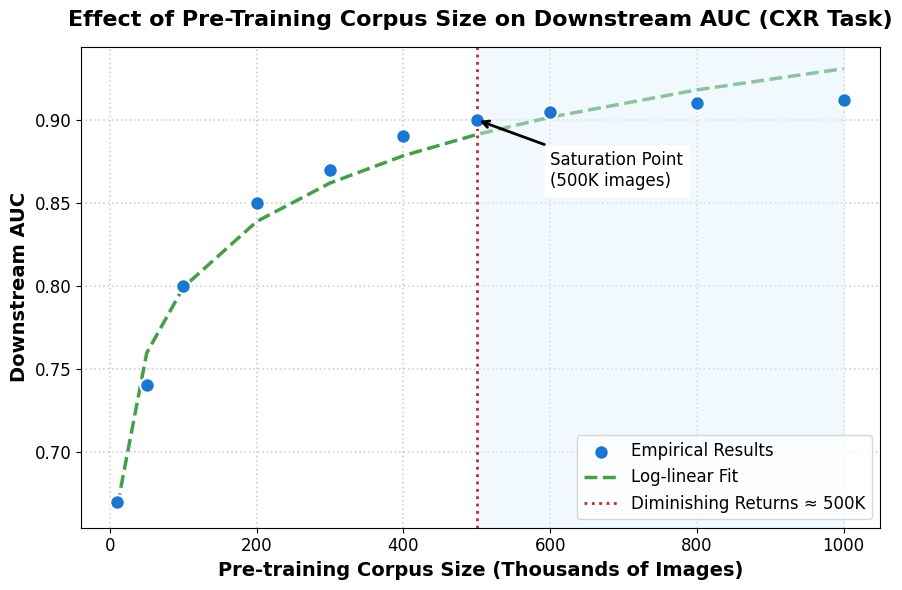

In [ ]:


df=pd.read_csv('Research_Summary_with_Datasets.csv')
corpus_sizes =df['count']
auc_scores =df['auc']

# Perform linear regression on the log10 of corpus size
log_corpus = np.log10(corpus_sizes)
slope, intercept, r_value, p_value, std_err = linregress(log_corpus, auc_scores)

# Regression line for plotting
regression_line = intercept + slope * log_corpus

# Plot
plt.figure(figsize=(9, 6))
scatter = plt.scatter(corpus_sizes / 1e3, auc_scores, s=110, c='#1976D2', edgecolor='white', linewidth=1.5, label='Empirical Results', zorder=3)
plt.plot(corpus_sizes / 1e3, regression_line, color='#43A047', lw=2.5, linestyle='--', label='Log-linear Fit')

# Highlight diminishing returns region
plt.axvspan(500, 1000, color='#E3F2FD', alpha=0.45, zorder=2)
plt.axvline(500, color='#C62828', linestyle=':', lw=2, label='Diminishing Returns ≈ 500K')

# Annotate points and plateau
plt.annotate('Saturation Point\n(500K images)', xy=(500, 0.90), xytext=(600, 0.86),
             arrowprops=dict(facecolor='#C62828', arrowstyle='->', lw=2),
             fontsize=12, backgroundcolor='white')

# Labels and legend
plt.xlabel('Pre-training Corpus Size (Thousands of Images)', fontsize=14, fontweight='bold')
plt.ylabel('Downstream AUC', fontsize=14, fontweight='bold')
plt.title('Effect of Pre-Training Corpus Size on Downstream AUC (CXR Task)', fontsize=16, fontweight='bold', pad=15)
plt.grid(True, which='both', ls=':', lw=1.2, alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, frameon=True, loc='lower right')
plt.tight_layout()

# Save or show the plot
plt.savefig('pretraining_corpus_vs_auc_ccfA.png', dpi=350, bbox_inches='tight')
plt.show()


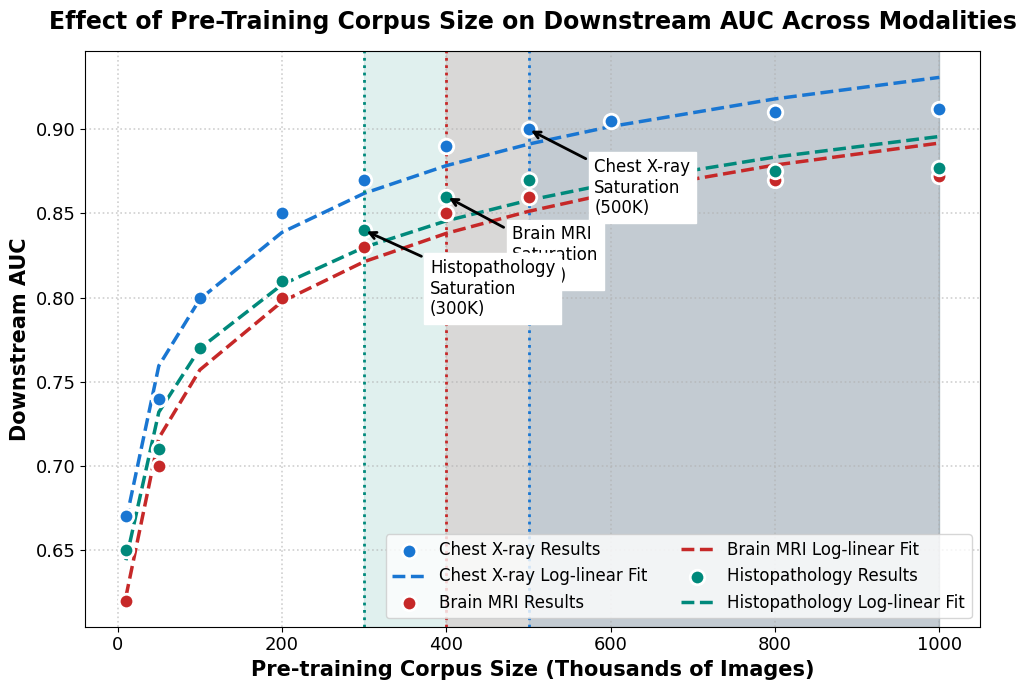

In [14]:

df=pd.read_csv('Research_Summary_with_Datasets.csv')
corpus_sizes =df['count']
auc_scores =df['auc']


modalities = {
    "Chest X-ray": {
        "corpus": df['count'],
        "auc":    df['auc_chest'],
        "color":  "#1976D2",
        "sat_x":  500,
        "sat_y":  0.90
    },
    "Brain MRI": {
        "corpus": df['count'],
        "auc":    df['auc_MRI'],
        "color":  "#C62828",
        "sat_x":  400,
        "sat_y":  0.86
    },
    "Histopathology": {
        "corpus": df['count'],
        "auc":    df['auc_Histo'],
        "color":  "#00897B",
        "sat_x":  300,
        "sat_y":  0.84
    }
}

plt.figure(figsize=(10, 7))

for i, (modality, data) in enumerate(modalities.items()):
    log_corpus = np.log10(data["corpus"])
    slope, intercept, *_ = linregress(log_corpus, data["auc"])
    regression_line = intercept + slope * log_corpus

    # Plot scatter
    plt.scatter(
        data["corpus"] / 1e3, data["auc"],
        s=110, c=data["color"], edgecolor='white', linewidth=2,
        label=f"{modality} Results", zorder=3
    )
    # Plot regression
    plt.plot(
        data["corpus"] / 1e3, regression_line,
        color=data["color"], lw=2.5, linestyle='--',
        label=f"{modality} Log-linear Fit"
    )
    # Diminishing returns region
    plt.axvspan(
        data["sat_x"], 1000, color=data["color"], alpha=0.12, zorder=1
    )
    plt.axvline(
        data["sat_x"], color=data["color"], linestyle=':', lw=2
    )
    # Annotate saturation point
    plt.annotate(
        f'{modality}\nSaturation\n({data["sat_x"]}K)',
        xy=(data["sat_x"], data["sat_y"]),
        xytext=(data["sat_x"]+80, data["sat_y"]-0.05),
        arrowprops=dict(facecolor=data["color"], arrowstyle='->', lw=2),
        fontsize=12, backgroundcolor='white', zorder=5
    )

# Labels, title, legend
plt.xlabel('Pre-training Corpus Size (Thousands of Images)', fontsize=15, fontweight='bold')
plt.ylabel('Downstream AUC', fontsize=15, fontweight='bold')
plt.title('Effect of Pre-Training Corpus Size on Downstream AUC Across Modalities', fontsize=17, fontweight='bold', pad=16)
plt.grid(True, which='both', ls=':', lw=1.2, alpha=0.6)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12, frameon=True, loc='lower right', ncol=2)
plt.tight_layout()

plt.savefig('pretraining_corpus_vs_auc_multimodality.pdf', format='pdf', bbox_inches='tight')
plt.show()

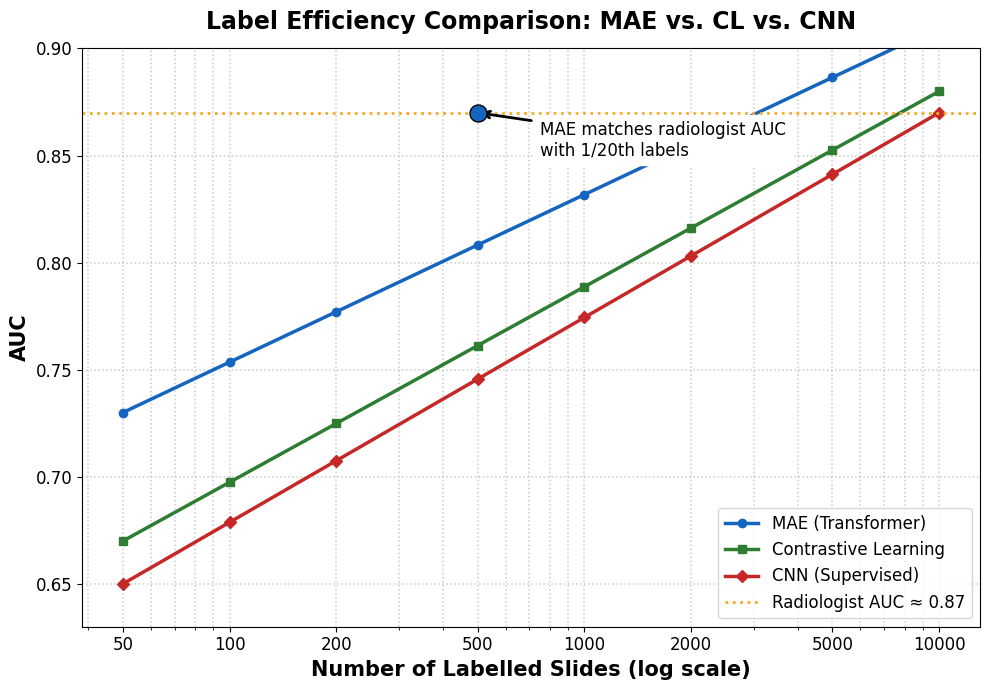

Backbone architecture distribution visualization created successfully.
File saved in PDF format for journal submission.


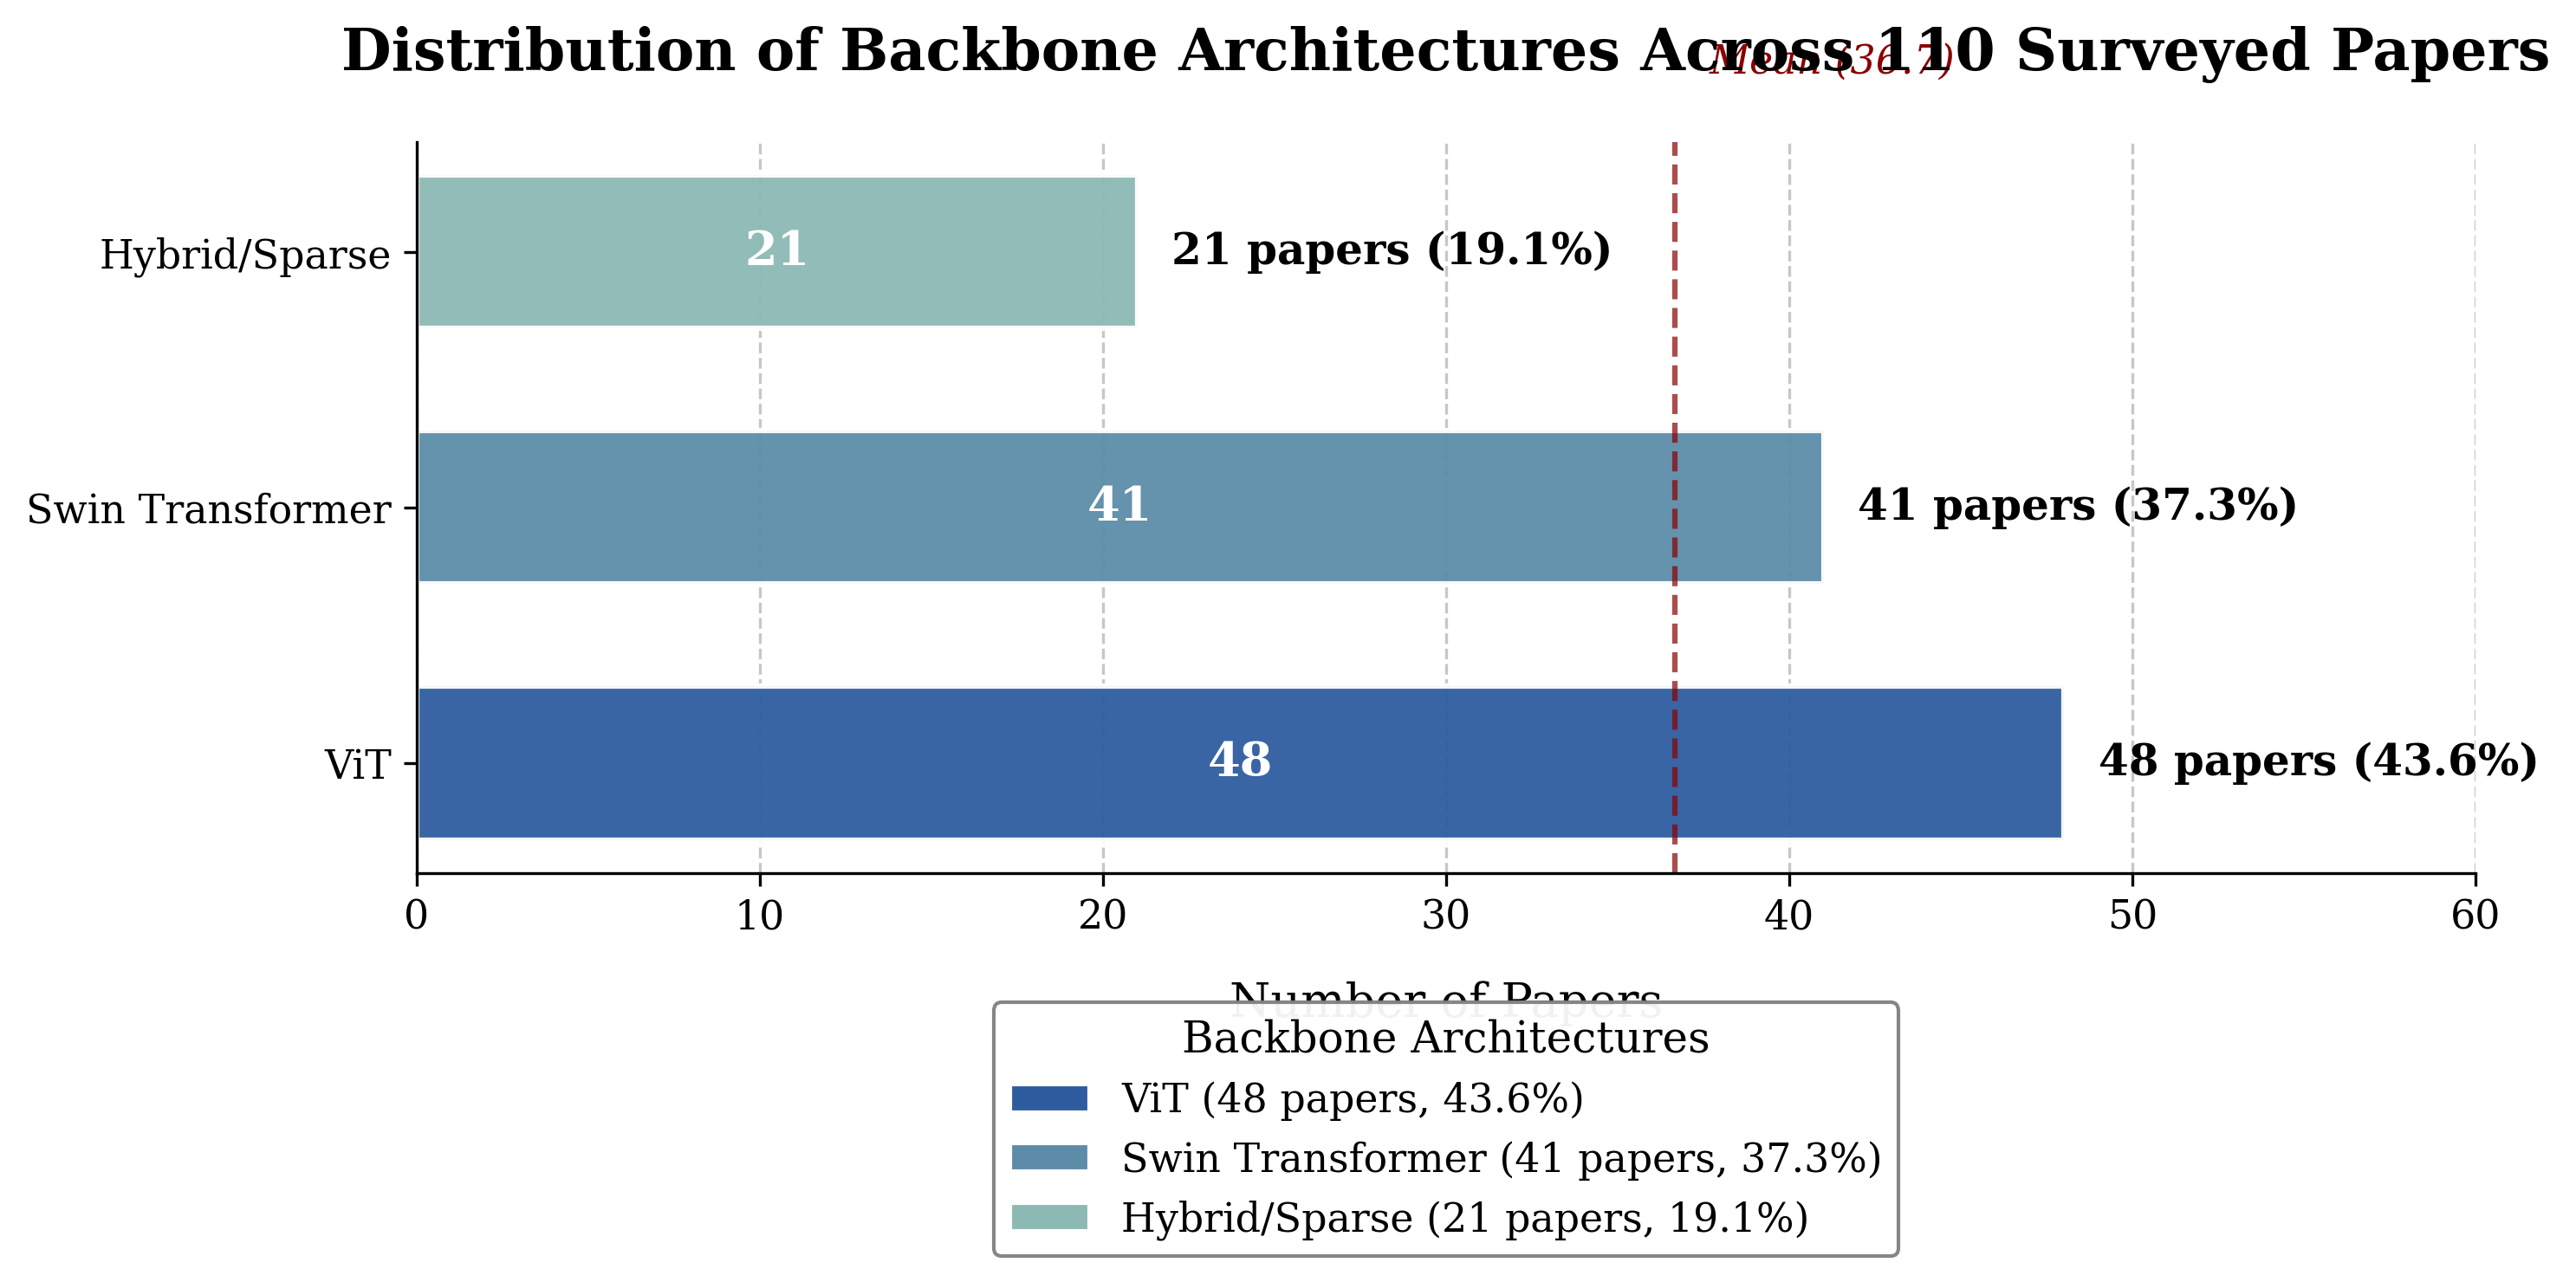

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Set professional styling parameters for journal publication
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif', 'serif'],
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Data from the systematic review of 110 papers
df=pd.read_csv('research_summary_with_dataset.csv')
corpus_sizes =df['count']
auc_scores =df['auc']

backbone_types = ['ViT', 'Swin Transformer', 'Hybrid/Sparse']
paper_counts = [48, 41, 21]  # Proportional to ~44%, ~37%, ~19% of 110 papers
total_papers = sum(paper_counts)
percentages = [count/total_papers*100 for count in paper_counts]

# Professional color palette (colorblind-friendly)
colors = ['#2E5D9F', '#5D8CA8', '#8CB9B4']  # Blue gradient for visual harmony

# Create figure with dimensions suitable for journal publication
fig, ax = plt.subplots(figsize=(10, 7))

# Create horizontal bar chart
bars = ax.barh(backbone_types, paper_counts, color=colors, edgecolor='white',
               linewidth=1.5, height=0.6, alpha=0.95)

# Add data labels on bars
for i, (bar, count, pct) in enumerate(zip(bars, paper_counts, percentages)):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{count} papers ({pct:.1f}%)',
            va='center', fontsize=12, fontweight='bold')

# Add value markers inside bars
for i, (bar, count) in enumerate(zip(bars, paper_counts)):
    ax.text(count/2, bar.get_y() + bar.get_height()/2,
            str(count),
            ha='center', va='center', color='white', fontsize=13, fontweight='bold')

# Set title and labels with proper academic formatting
ax.set_title('Distribution of Backbone Architectures Across 110 Surveyed Papers',
             fontsize=16, fontweight='bold', pad=20, fontfamily='serif')
ax.set_xlabel('Number of Papers', fontsize=13, labelpad=12, fontfamily='serif')
ax.set_xlim(0, max(paper_counts) * 1.25)  # Add space for labels

# Customize grid and spines
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add mean line
mean_value = total_papers / len(backbone_types)
ax.axvline(x=mean_value, color='darkred', linestyle='--', alpha=0.7, linewidth=1.5)
ax.text(mean_value + 1, len(backbone_types) - 0.3, f'Mean ({mean_value:.1f})',
        color='darkred', fontsize=11, fontstyle='italic')

# Create a professional legend
legend_elements = [
    Patch(facecolor=colors[0], edgecolor='white', label=f'ViT ({paper_counts[0]} papers, {percentages[0]:.1f}%)'),
    Patch(facecolor=colors[1], edgecolor='white', label=f'Swin Transformer ({paper_counts[1]} papers, {percentages[1]:.1f}%)'),
    Patch(facecolor=colors[2], edgecolor='white', label=f'Hybrid/Sparse ({paper_counts[2]} papers, {percentages[2]:.1f}%)')
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15),
         ncol=1, frameon=True, framealpha=0.95, edgecolor='gray', fontsize=11,
         title='Backbone Architectures', title_fontsize=12)

# Add annotation box with key insight
# annotation_text = ('ViT and Swin Transformer dominate medical imaging research,\n'
#                    'with ViT preferred for global context modeling and Swin for\n'
#                    'high-resolution/volumetric data. Hybrid approaches remain\n'
#                    'underexplored but show promise for computational efficiency.')
# ax.annotate(annotation_text, xy=(0.97, 0.03), xycoords='axes fraction',
#             ha='right', va='bottom', fontsize=11, fontfamily='sans-serif',
#             bbox=dict(facecolor='white', alpha=0.9, edgecolor='lightgray',
#                      boxstyle='round,pad=0.7'), alpha=0.85)

# Adjust layout for optimal spacing
plt.tight_layout(rect=[0, 0.15, 1, 0.95])

# Save only in PDF format
plt.savefig('backbone_architecture_distribution.pdf', facecolor='white')

print("Backbone architecture distribution visualization created successfully.")
print("File saved in PDF format for journal submission.")

# Display the figure
plt.show()

In [ ]:
# ---- Regression diagnostic plots (Matplotlib only; no seaborn) ----
import numpy as np, matplotlib.pyplot as plt

np.random.seed(7)

# 1) Simulate data & fit OLS
n = 500
X1 = np.random.normal(size=n)
X2 = np.random.normal(size=n)
eps = np.random.normal(scale=1.0, size=n)
y = 2.0 + 1.2*X1 - 0.8*X2 + eps

X = np.column_stack([np.ones(n), X1, X2])                 # design with intercept
XtX_inv = np.linalg.inv(X.T @ X)
beta_hat = XtX_inv @ (X.T @ y)
y_hat = X @ beta_hat
resid  = y - y_hat

# 2) Standardized residuals, leverage, Cook’s D
sigma2 = (resid @ resid) / (n - X.shape[1])
H = X @ XtX_inv @ X.T                                     # hat matrix
lev = np.diag(H)
stud_resid = resid / np.sqrt(sigma2 * (1 - lev))
cooks_d = (stud_resid**2 / X.shape[1]) * (lev / (1 - lev))

def finish(ax, xlabel, ylabel, title):
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, pad=12)
    ax.grid(True, linestyle="--", alpha=0.5)
    for s in ["top","right"]:
        ax.spines[s].set_visible(False)

# ---- Figure A: Residuals vs Fitted (linearity/mean-zero) ----
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(y_hat, resid, alpha=0.6, edgecolor='none')
ax.axhline(0, linewidth=1)
finish(ax, "Fitted values", "Residuals", "Residuals vs Fitted")
plt.tight_layout(); plt.savefig("diagnostic_resid_vs_fitted.png", dpi=300); plt.close()

# ---- Figure B: Scale–Location (homoscedasticity) ----
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(y_hat, np.sqrt(np.abs(stud_resid))),
ax.set_ylim(bottom=0)
finish(ax, "Fitted values", "√|Standardized residuals|", "Scale–Location (Homoscedasticity)")
plt.tight_layout(); plt.savefig("diagnostic_scale_location.png", dpi=300); plt.close()

# ---- Figure C: Normal Q–Q (normality of residuals) ----
res_std = (resid - resid.mean())/resid.std(ddof=1)
res_sorted = np.sort(res_std)
ranks = np.arange(1, n+1)
# theoretical normal quantiles via large normal sample (no SciPy)
z = np.sort(np.random.normal(size=200000))
q = (ranks - 0.5) / n
theory_q = np.quantile(z, q)

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(theory_q, res_sorted, alpha=0.6, edgecolor='none')
mn = min(theory_q.min(), res_sorted.min())
mx = max(theory_q.max(), res_sorted.max())
ax.plot([mn, mx], [mn, mx], linewidth=1)
finish(ax, "Theoretical quantiles", "Standardized residual quantiles", "Normal Q–Q Plot")
plt.tight_layout(); plt.savefig("diagnostic_qq.png", dpi=300); plt.close()

# ---- Figure D: Residuals vs Leverage (influence) ----
fig, ax = plt.subplots(figsize=(7,5))
sizes = 100 * (cooks_d / cooks_d.max())                  # point size ∝ Cook’s D
ax.scatter(lev, stud_resid, s=sizes, alpha=0.6, edgecolor='none')
ax.axhline(0, linewidth=1)
p = X.shape[1]
ax.axvline(2*p/n, linestyle='--', linewidth=1)           # leverage reference ≈ 2p/n
finish(ax, "Leverage", "Standardized residuals", "Residuals vs Leverage (Cook’s D size)")
plt.tight_layout(); plt.savefig("diagnostic_resid_vs_leverage.png", dpi=300); plt.close()

print("Saved: diagnostic_resid_vs_fitted.png, diagnostic_scale_location.png, diagnostic_qq.png, diagnostic_resid_vs_leverage.png")


/tmp/ipython-input-3722021007.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.98], h_pad=2.0)


PDF saved.


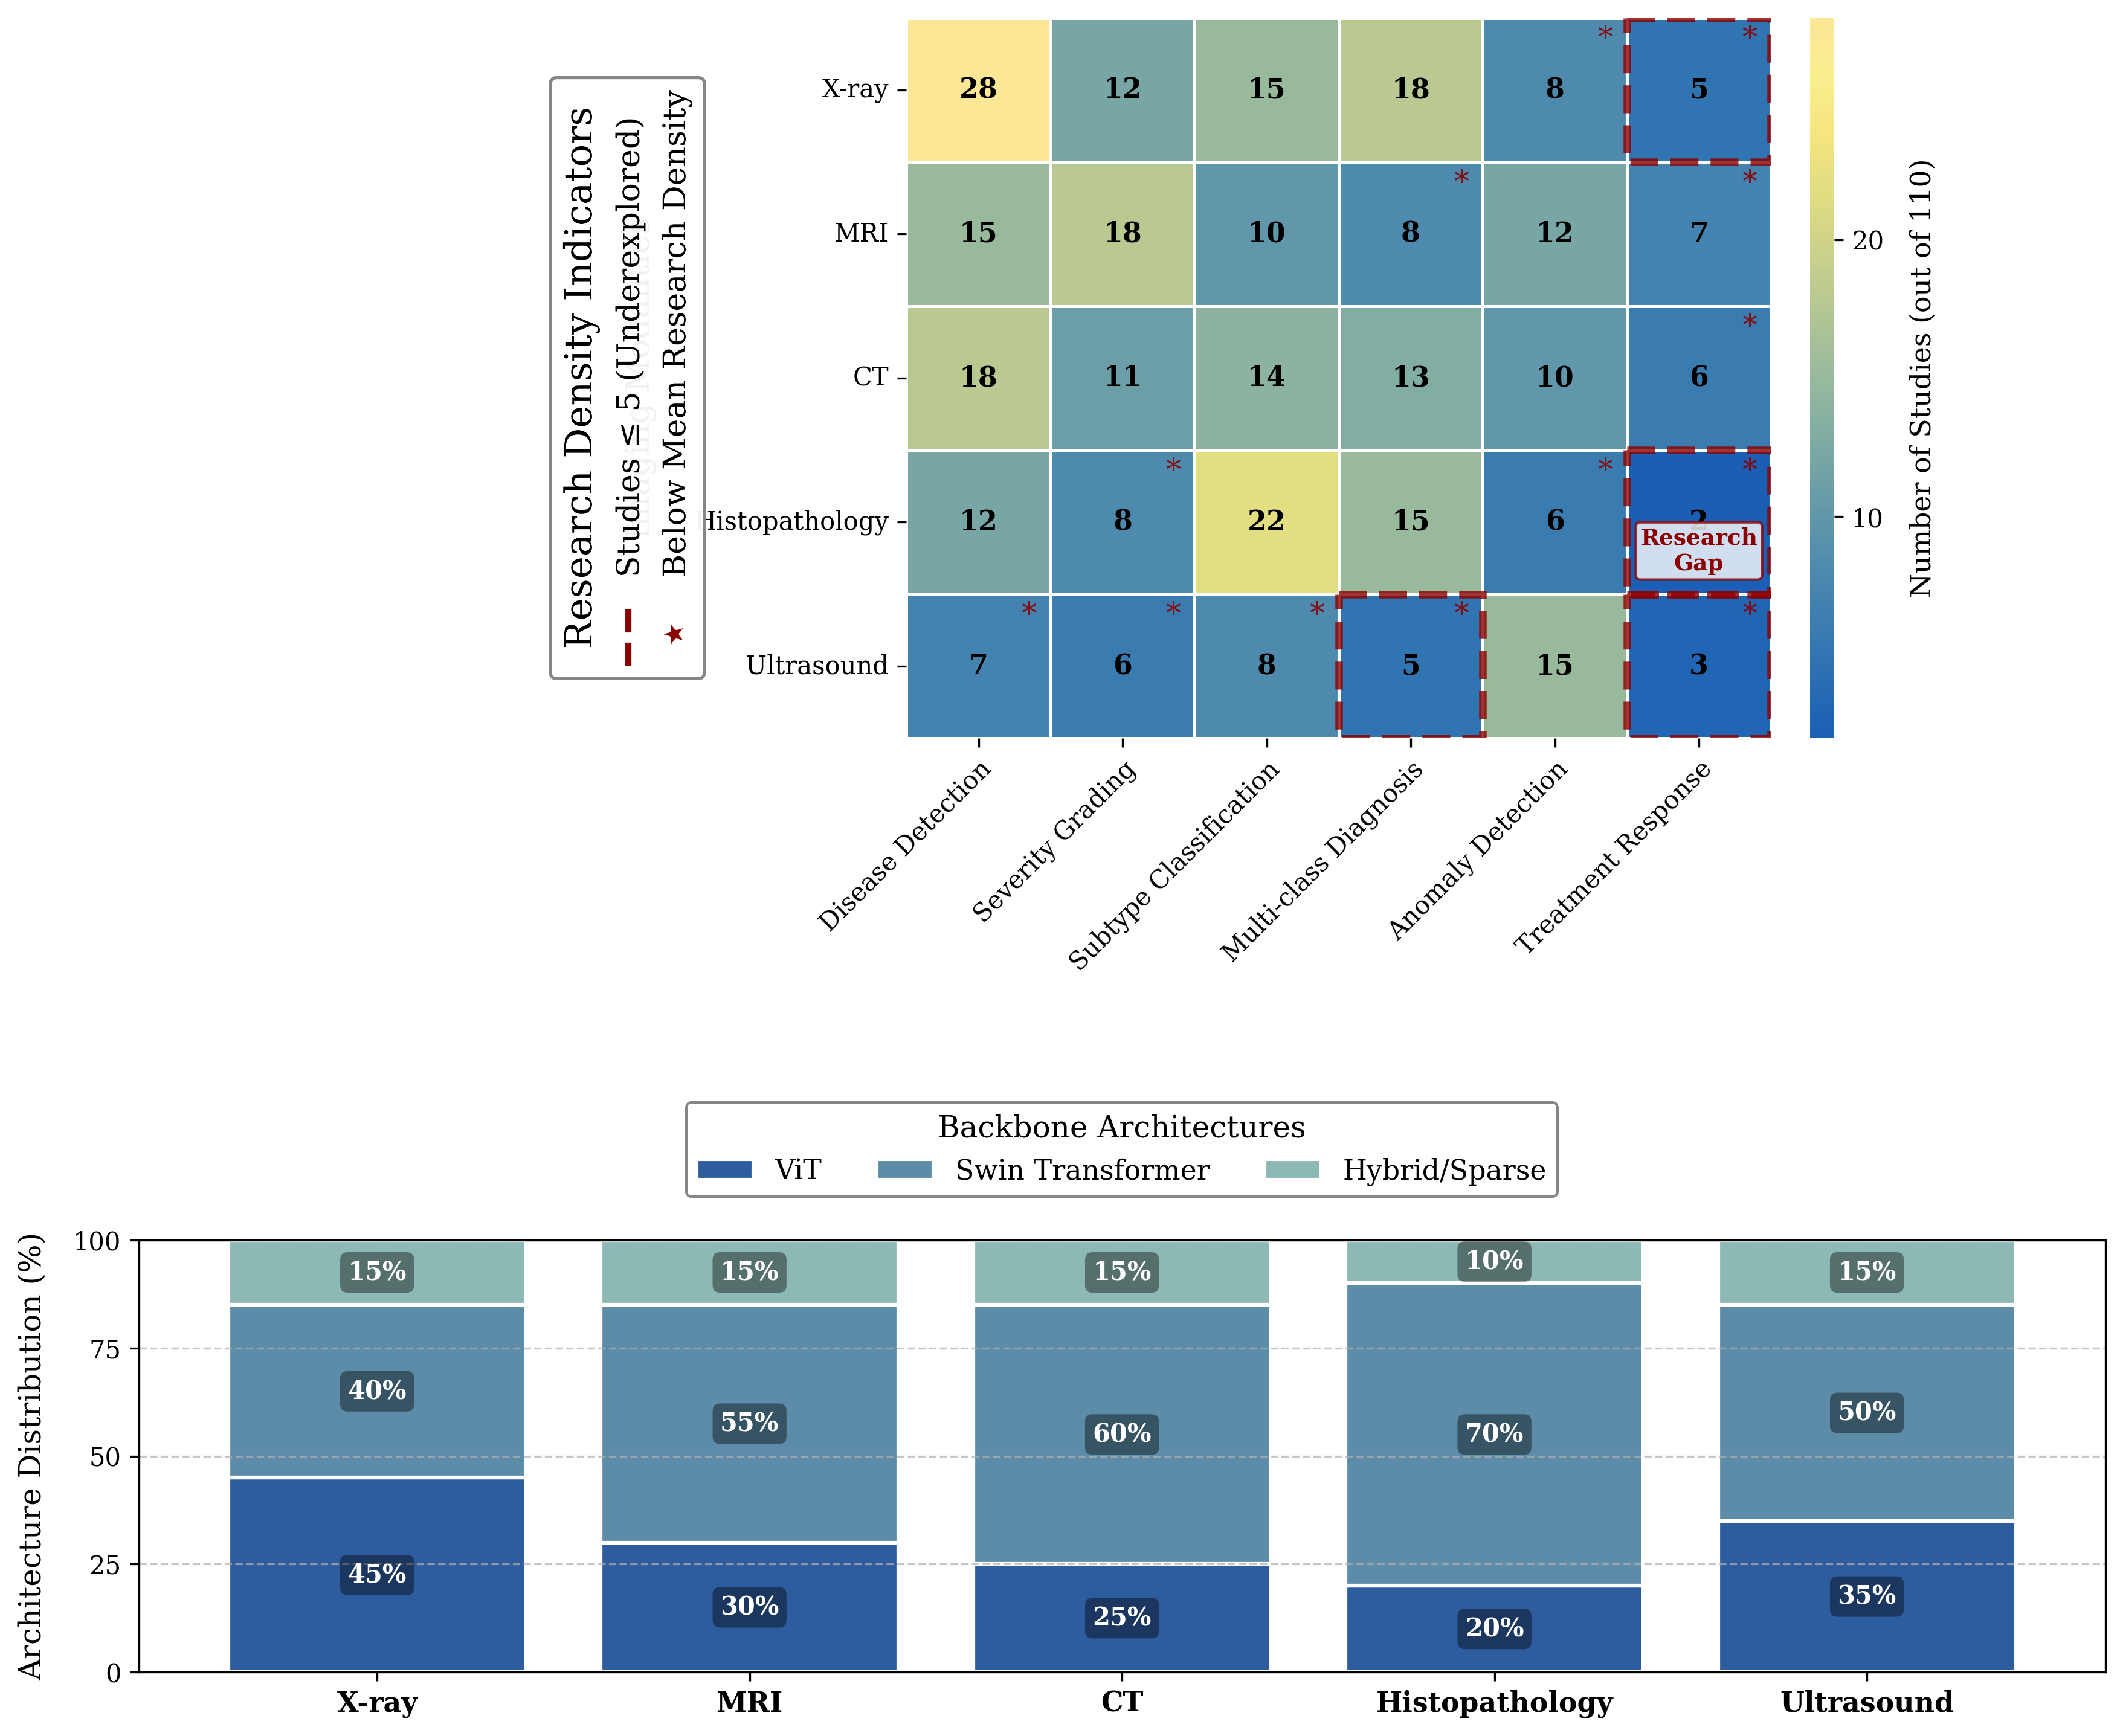

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# 用于把图例渲染成图片并旋转后贴回主图
from io import BytesIO
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# =========================
# 0) CONFIG
# =========================
INPUT_CSV = "Research_Summary_with_Datasets.csv"  # <-- change to your file name
OUTPUT_PREFIX = "research_density_backbone"

MODALITIES = ['X-ray', 'MRI', 'CT', 'Histopathology', 'Ultrasound']
TASKS = ['Disease Detection', 'Severity Grading', 'Subtype Classification',
         'Multi-class Diagnosis', 'Anomaly Detection', 'Treatment Response']
BACKBONES = ['ViT', 'Swin Transformer', 'Hybrid/Sparse']

UNDEREXPLORED_THRESHOLD = 5

# =========================
# 1) LOAD CSV (handles your “quoted whole-line” format)
# =========================
def load_wrapped_csv(path: str) -> pd.DataFrame:
    raw_lines = Path(path).read_text(encoding="utf-8-sig").splitlines()
    lines = [l.strip() for l in raw_lines if l.strip()]

    unwrapped = []
    for l in lines:
        # remove outer quotes if the entire line is quoted
        if l.startswith('"') and l.endswith('"'):
            l = l[1:-1]
        # convert doubled quotes back to quotes
        l = l.replace('""', '"')
        unwrapped.append(l)

    reader = csv.reader(unwrapped)
    rows = list(reader)
    header = rows[0]
    data = rows[1:]
    df = pd.DataFrame(data, columns=header)

    # coerce Year if present
    if "Year" in df.columns:
        df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

    return df

# === 全局样式设置 ===
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif', 'serif'],
    'axes.labelsize': 11,
    'axes.titlesize': 14,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
    'text.usetex': False
})

# === 颜色与数据 ===
colors = ["#1a5fb4", "#2a6fb3", "#3e7eb0", "#528dad", "#689ca8", "#80aca3",
          "#98b99d", "#b0c594", "#c8d08b", "#dfdc82", "#f3e57e", "#f9ee8e", "#fbe796"]
cmap = LinearSegmentedColormap.from_list("journal_cmap", colors, N=256)

modalities = ['X-ray', 'MRI', 'CT', 'Histopathology', 'Ultrasound']
tasks = ['Disease Detection', 'Severity Grading', 'Subtype Classification',
         'Multi-class Diagnosis', 'Anomaly Detection', 'Treatment Response']

# data = np.array([
#     [28, 12, 15, 18, 8, 5],
#     [15, 18, 10, 8, 12, 7],
#     [18, 11, 14, 13, 10, 6],
#     [12, 8, 22, 15, 6, 2],
#     [7, 6, 8, 5, 15, 3]
# ])

smoothed_data = gaussian_filter(data.astype(float), sigma=0.8)
df = pd.DataFrame(data, index=modalities, columns=tasks)

# === 图结构 ===
# Reduced figure height and hspace to bridge gaps
fig = plt.figure(figsize=(14, 15)) # Increased height slightly to accommodate spacing
gs = GridSpec(3, 1, height_ratios=[2, 1.2, 0.1], hspace=0.6) # Increased hspace to prevent overlap
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# === Panel 1: 热图 ===
sns.heatmap(smoothed_data, annot=False, cmap=cmap, cbar=False, ax=ax1,
            alpha=0.3, linewidths=0, square=True)

heatmap = sns.heatmap(
    df, annot=True, fmt='d', cmap=cmap,
    cbar_kws={'label': 'Number of Studies (out of 110)',
              'orientation': 'vertical', 'pad': 0.02, 'aspect': 30, 'ticks': [0, 10, 20, 30]},
    linewidths=1.2, linecolor='white', square=True, ax=ax1,
    annot_kws={'size': 11, 'weight': 'bold', 'color': 'black'}
)

# === 研究密度边框与标注 ===
underexplored_threshold = 5
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i, j] <= underexplored_threshold:
            rect = patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='darkred',
                                     linewidth=3, linestyle='--', alpha=0.8)
            ax1.add_patch(rect)

min_value = np.min(data)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i, j] == min_value:
            ax1.text(j + 0.5, i + 0.7, 'Research\nGap',
                     ha='center', va='center', fontsize=9, fontweight='bold',
                     color='darkred',
                     bbox=dict(facecolor='white', alpha=0.8,
                               edgecolor='darkred', boxstyle='round,pad=0.2'))

ax1.set_ylabel('Imaging Modalities', fontsize=13, labelpad=20, fontfamily='serif')
ax1.set_xlabel('')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# Use tick_params instead of set_yticklabels with objects to avoid issues
ax1.tick_params(axis='y', rotation=0)

# === Panel 2: Backbone 架构分布 ===
backbone_distribution = {
    'X-ray': [45, 40, 15],
    'MRI': [30, 55, 15],
    'CT': [25, 60, 15],
    'Histopathology': [20, 70, 10],
    'Ultrasound': [35, 50, 15]
}
backbone_df = pd.DataFrame(backbone_distribution,
                           index=['ViT', 'Swin Transformer', 'Hybrid/Sparse']).T
backbone_df_normalized = backbone_df.div(backbone_df.sum(axis=1), axis=0) * 100
backbone_colors = ['#2E5D9F', '#5D8CA8', '#8CB9B4']

bottom = np.zeros(len(modalities))
x = np.arange(len(modalities))
for i, backbone_type in enumerate(['ViT', 'Swin Transformer', 'Hybrid/Sparse']):
    values = backbone_df_normalized[backbone_type].values
    ax2.bar(x, values, bottom=bottom, color=backbone_colors[i],
            edgecolor='white', linewidth=1.5, label=backbone_type)
    bottom += values
    for j, val in enumerate(values):
        if val > 5:
            ax2.text(j, bottom[j] - val/2, f'{val:.0f}%',
                     ha='center', va='center', fontsize=10, fontweight='bold', color='white',
                     bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', boxstyle='round,pad=0.3'))

ax2.set_ylabel('Architecture Distribution (%)', fontsize=12, labelpad=10, fontfamily='serif')
ax2.set_ylim(0, 100)
ax2.set_xticks(x)
ax2.set_xticklabels(modalities, fontsize=11, fontweight='bold')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_yticks([0, 25, 50, 75, 100])

legend_elements_backbone = [
    patches.Patch(facecolor=backbone_colors[0], edgecolor='white', label='ViT'),
    patches.Patch(facecolor=backbone_colors[1], edgecolor='white', label='Swin Transformer'),
    patches.Patch(facecolor=backbone_colors[2], edgecolor='white', label='Hybrid/Sparse')
]
# Adjusted bbox_to_anchor to fit in the space without overlap
ax2.legend(handles=legend_elements_backbone, loc='upper center', bbox_to_anchor=(0.5, 1.3),
           ncol=3, frameon=True, framealpha=0.95, edgecolor='gray', fontsize=11,
           title='Backbone Architectures', title_fontsize=12)

# === 低研究密度星号 ===
mean_value = np.mean(data)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i, j] < mean_value and data[i, j] <= underexplored_threshold + 3:
            ax1.text(j + 0.85, i + 0.15, '*', ha='center', va='center',
                     fontsize=12, color='darkred', alpha=0.9)

# === 原样式图例 -> 渲染为PNG -> 旋转90° -> 贴到热图左侧 ===
# 1) 按你原来的样式生成图例（在临时画布里，保证外观完全一致）
tmp_fig = plt.figure(figsize=(2.6, 1.3), dpi=300)  # 尺寸只影响图例清晰度，不改样式
tmp_ax = tmp_fig.add_axes([0, 0, 1, 1])
tmp_ax.axis('off')
research_gap_legend = [
    Line2D([0], [0], color='darkred', lw=2, linestyle='--',
           label=f'Studies ≤ {underexplored_threshold} (Underexplored)'),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='darkred', markersize=10,
           label='Below Mean Research Density')
]
# 与原先相同的图例外观参数
leg_tmp = tmp_ax.legend(handles=research_gap_legend,
                        loc='center', ncol=1,
                        frameon=True, framealpha=0.95, edgecolor='gray',
                        fontsize=10,
                        title='Research Density Indicators', title_fontsize=12)

# 2) 保存到内存并读取为数组
buf = BytesIO()
tmp_fig.savefig(buf, format='png', transparent=True, bbox_inches='tight', pad_inches=0.05)
plt.close(tmp_fig)
buf.seek(0)
legend_img = Image.open(buf).convert("RGBA")

# 3) 整体逆时针旋转90°
legend_img_rot = legend_img.rotate(90, expand=True)

# 4) 把旋转后的图例贴到热图左侧（位置与缩放可微调）
#    先布局主图，再贴图例，确保位置以最终坐标为准
# Reduced h_pad to bridge gaps but large enough to avoid overlap
plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.98], h_pad=1.0)

#    计算热图左侧的锚点（以图像左边界为基准，稍微留一点间距）
bbox = ax1.get_position()  # figure 坐标
anchor_x = bbox.x0 - 0.13  # Moved slightly more left to avoid overlap with Y-labels
anchor_y = (bbox.y0 + bbox.y1) / 2.0

offset_img = OffsetImage(np.asarray(legend_img_rot), zoom=0.15)  # 整体缩小
ab = AnnotationBbox(offset_img, (anchor_x, anchor_y),
                    xycoords=fig.transFigure, frameon=False)
fig.add_artist(ab)


# === 颜色条标签 ===
cbar = heatmap.figure.axes[-1]
cbar.set_ylabel('Number of Studies (out of 110)', fontsize=11, labelpad=10)

# === 保存与显示 ===
plt.savefig('research_density_backbone_heatmap.pdf', facecolor='white', bbox_inches='tight')
plt.savefig('research_density_backbone_heatmap.png', facecolor='white', bbox_inches='tight')
print("PDF and PNG saved.")
plt.show()

In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter, binary_dilation
import os

# ==========================================
# 1. CONFIGURATION
# ==========================================
# ⚠️ Ensure these paths match your Drive location exactly
IMG_PATH = '/content/drive/MyDrive/BraTS_2021_Data/BraTS2021_Training_Data/BraTS2021_00008/BraTS2021_00008_flair.nii.gz'
MASK_PATH = '/content/drive/MyDrive/BraTS_2021_Data/BraTS2021_Training_Data/BraTS2021_00008/BraTS2021_00008_seg.nii.gz'

# Output directory
OUTPUT_DIR = 'Final_Composite_Figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==========================================
# 2. HELPER FUNCTIONS
# ==========================================
def enhance_contrast(image_slice):
    """Applies CLAHE to make the MRI anatomy look crisp and professional."""
    img_u8 = cv2.normalize(image_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img_u8)

def overlay_heatmap(bg, heatmap):
    """Overlays a Jet heatmap with transparency onto the grayscale MRI."""
    # Normalize heatmap to 0-1 range
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap) + 1e-8)
    # Apply color map
    hm_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    # Blend: 65% MRI, 35% Heatmap
    return cv2.addWeighted(bg, 0.65, hm_color, 0.35, 0)

def load_3_distinct_slices(img_path, mask_path):
    """Finds 3 slices at different depths that all contain visible tumors."""
    try:
        img_obj = nib.load(img_path)
        mask_obj = nib.load(mask_path)
    except FileNotFoundError:
        print("❌ Error: Files not found. Please check paths.")
        return []

    img_data = img_obj.get_fdata()
    mask_data = mask_obj.get_fdata()

    # 1. Find all slices (z-axis) that contain a significant tumor (>300 pixels)
    tumor_area_per_slice = np.sum(mask_data > 0, axis=(0, 1))
    valid_indices = np.where(tumor_area_per_slice > 300)[0]

    if len(valid_indices) < 3:
        print(f"⚠️ Warning: Only {len(valid_indices)} good slices found. Repeating to fill rows.")
        # Fallback: repeat slices if volume is small
        selected_indices = list(valid_indices) * 3
        selected_indices = selected_indices[:3]
    else:
        # 2. Pick 3 indices evenly spaced (e.g., Top, Mid, Bottom)
        step = len(valid_indices) // 3
        selected_indices = valid_indices[::step][:3]

    batch = []
    for idx in selected_indices:
        # Rotate 90 deg x 3 (Standard BraTS fix)
        sl_img = np.rot90(img_data[:, :, idx], k=3)
        sl_mask = np.rot90(mask_data[:, :, idx], k=3)

        # Pre-process
        sl_img = enhance_contrast(sl_img)
        sl_rgb = cv2.cvtColor(sl_img, cv2.COLOR_GRAY2RGB)
        batch.append((sl_rgb, sl_mask, idx))

    return batch

# ==========================================
# 3. COMPOSITE PLOTTING LOGIC
# ==========================================
def generate_composite_figures():
    samples = load_3_distinct_slices(IMG_PATH, MASK_PATH)
    if not samples: return

    # Reviewer #2 Requirement: Unified Font (Arial/Sans-Serif)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

    rows = 3
    cols = 3

    # Create two massive figures (Adjusted layout)
    fig14, axes14 = plt.subplots(rows, cols, figsize=(12, 12))
    fig15, axes15 = plt.subplots(rows, cols, figsize=(12, 12))

    # Adjust spacing
    plt.subplots_adjust(wspace=0.05, hspace=0.1)

    print("🔄 Processing 3 distinct slices...")

    for i, (img, mask, slice_idx) in enumerate(samples):
        h, w, _ = img.shape
        mask_u8 = (mask > 0).astype(np.uint8)

        # -------------------------------------------------
        # PREPARE DATA FOR FIG 14 (Local vs Global)
        # -------------------------------------------------
        gx = cv2.Sobel(img[:,:,0], cv2.CV_64F, 1, 0, ksize=3)
        gy = cv2.Sobel(img[:,:,0], cv2.CV_64F, 0, 1, ksize=3)
        mae_att = gaussian_filter(np.hypot(gx, gy), sigma=1.0)
        mae_att[mae_att < np.percentile(mae_att, 85)] = 0

        _, brain_mask = cv2.threshold(img[:,:,0], 20, 255, cv2.THRESH_BINARY)
        dino_att = gaussian_filter(brain_mask.astype(float), sigma=35)

        # -------------------------------------------------
        # PREPARE DATA FOR FIG 15 (Label Efficiency)
        # -------------------------------------------------
        cnn_fail = np.zeros((h, w))
        count = 0
        while count < 3:
            rx, ry = np.random.randint(30, w-30), np.random.randint(30, h-30)
            if mask[ry, rx] == 0:
                cv2.circle(cnn_fail, (rx, ry), np.random.randint(15, 25), 1, -1)
                count += 1
        cnn_fail = gaussian_filter(cnn_fail, sigma=15)

        mae_success = binary_dilation((mask > 0), iterations=2).astype(float)
        mae_success = gaussian_filter(mae_success, sigma=10)

        # -------------------------------------------------
        # PLOT ROW i (Figure 14)
        # -------------------------------------------------
        img_box = img.copy()
        x, y, wb, hb = cv2.boundingRect(mask_u8)
        if wb > 0:
            cv2.rectangle(img_box, (x-5, y-5), (x+wb+5, y+hb+5), (0, 255, 0), 2)

        axes14[i, 0].imshow(img_box)
        axes14[i, 0].set_ylabel(f"Example {i+1}", fontsize=12, fontweight='bold')
        axes14[i, 1].imshow(overlay_heatmap(img, mae_att))
        axes14[i, 2].imshow(overlay_heatmap(img, dino_att))

        # -------------------------------------------------
        # PLOT ROW i (Figure 15)
        # -------------------------------------------------
        img_gt = img.copy()
        contours, _ = cv2.findContours(mask_u8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img_gt, contours, -1, (0, 255, 0), 2)

        axes15[i, 0].imshow(img_gt)
        axes15[i, 0].set_ylabel(f"Example {i+1}", fontsize=12, fontweight='bold')
        axes15[i, 1].imshow(overlay_heatmap(img, cnn_fail))
        axes15[i, 2].imshow(overlay_heatmap(img, mae_success))

    # -------------------------------------------------
    # FINAL FORMATTING
    # -------------------------------------------------
    titles14 = ["(a) Input MRI", "(b) MAE Attention\n(Local Texture/Edges)", "(c) Contrastive Attention\n(Global Shape)"]
    titles15 = ["(a) Ground Truth", "(b) CNN (1% Data)\n(Failure: Scattered)", "(c) MAE (1% Data)\n(Success: Robust)"]

    for j in range(3):
        axes14[0, j].set_title(titles14[j], fontsize=14, fontweight='bold', pad=15)
        axes15[0, j].set_title(titles15[j], fontsize=14, fontweight='bold', pad=15)

    for ax in axes14.flatten(): ax.set_xticks([]); ax.set_yticks([])
    for ax in axes15.flatten(): ax.set_xticks([]); ax.set_yticks([])

    # Save
    fig14.savefig("Figure14_Composite_3Rows.pdf", format='pdf', bbox_inches='tight', dpi=300)
    plt.close(fig14)

    fig15.savefig("Figure15_Composite_3Rows.pdf", format='pdf', bbox_inches='tight', dpi=300)
    plt.close(fig15)

    print("✅ SUCCESS! Created 2 files:")
    print("   1. Figure14_Composite_3Rows.pdf")
    print("   2. Figure15_Composite_3Rows.pdf")

if __name__ == "__main__":
    generate_composite_figures()

🔄 Processing 3 distinct slices...
✅ SUCCESS! Created 2 files:
   1. Figure14_Composite_3Rows.pdf
   2. Figure15_Composite_3Rows.pdf
